In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Pokemon.csv', index_col=1)
df.drop('Unnamed: 0', axis=1, inplace=True)
print("Pokeman dataset size:", df.shape)
print("Pokeman dataset head \n", df.head())

Pokeman dataset size: (151, 11)
Pokeman dataset head 
            Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
Name                                                                      
Bulbasaur   Grass  Poison    318  45      49       49       65       65   
Ivysaur     Grass  Poison    405  60      62       63       80       80   
Venusaur    Grass  Poison    525  80      82       83      100      100   
Charmander   Fire     NaN    309  39      52       43       60       50   
Charmeleon   Fire     NaN    405  58      64       58       80       65   

            Speed  Stage  Legendary  
Name                                 
Bulbasaur      45      1      False  
Ivysaur        60      2      False  
Venusaur       80      3      False  
Charmander     65      1      False  
Charmeleon     80      2      False  


In [3]:
print("column name and data types: \n", df.dtypes)

column name and data types: 
 Type 1       object
Type 2       object
Total         int64
HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp. Def       int64
Speed         int64
Stage         int64
Legendary      bool
dtype: object


In [4]:
pokemon = df.drop(columns=['Type 1','Type 2','Legendary'])

In [5]:
km = KMeans(n_clusters=2)
km.fit(pokemon)

KMeans(n_clusters=2)

In [6]:
pokemon['label'] = km.predict(pokemon)
print("dfpokeman with cluster labels: \n", pokemon)

dfpokeman with cluster labels: 
             Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage  label
Name                                                                          
Bulbasaur     318   45      49       49       65       65     45      1      0
Ivysaur       405   60      62       63       80       80     60      2      1
Venusaur      525   80      82       83      100      100     80      3      1
Charmander    309   39      52       43       60       50     65      1      0
Charmeleon    405   58      64       58       80       65     80      2      1
...           ...  ...     ...      ...      ...      ...    ...    ...    ...
Dratini       300   41      64       45       50       50     50      1      0
Dragonair     420   61      84       65       70       70     70      2      1
Dragonite     600   91     134       95      100      100     80      3      1
Mewtwo        680  106     110       90      154       90    130      1      1
Mew           600  

In [7]:
pokeman_mean = pokemon.groupby(['label']).agg('mean')
print(pokeman_mean)

            Total         HP     Attack    Defense    Sp. Atk    Sp. Def  \
label                                                                      
0      308.646154  47.800000  55.430769  56.861538  48.384615  46.446154   
1      481.476744  76.616279  85.488372  76.813953  81.313953  80.813953   

           Speed     Stage  
label                       
0      53.723077  1.123077  
1      80.430233  1.930233  


Stage: 0.41816496756255794


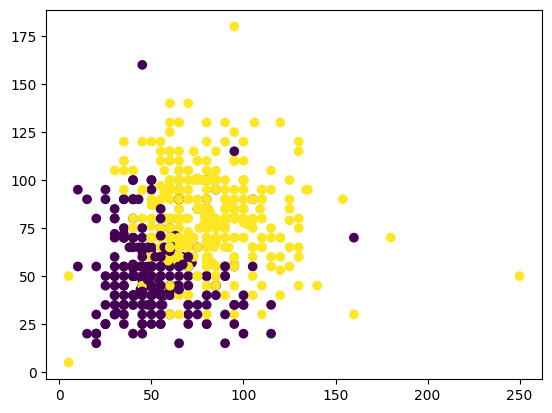

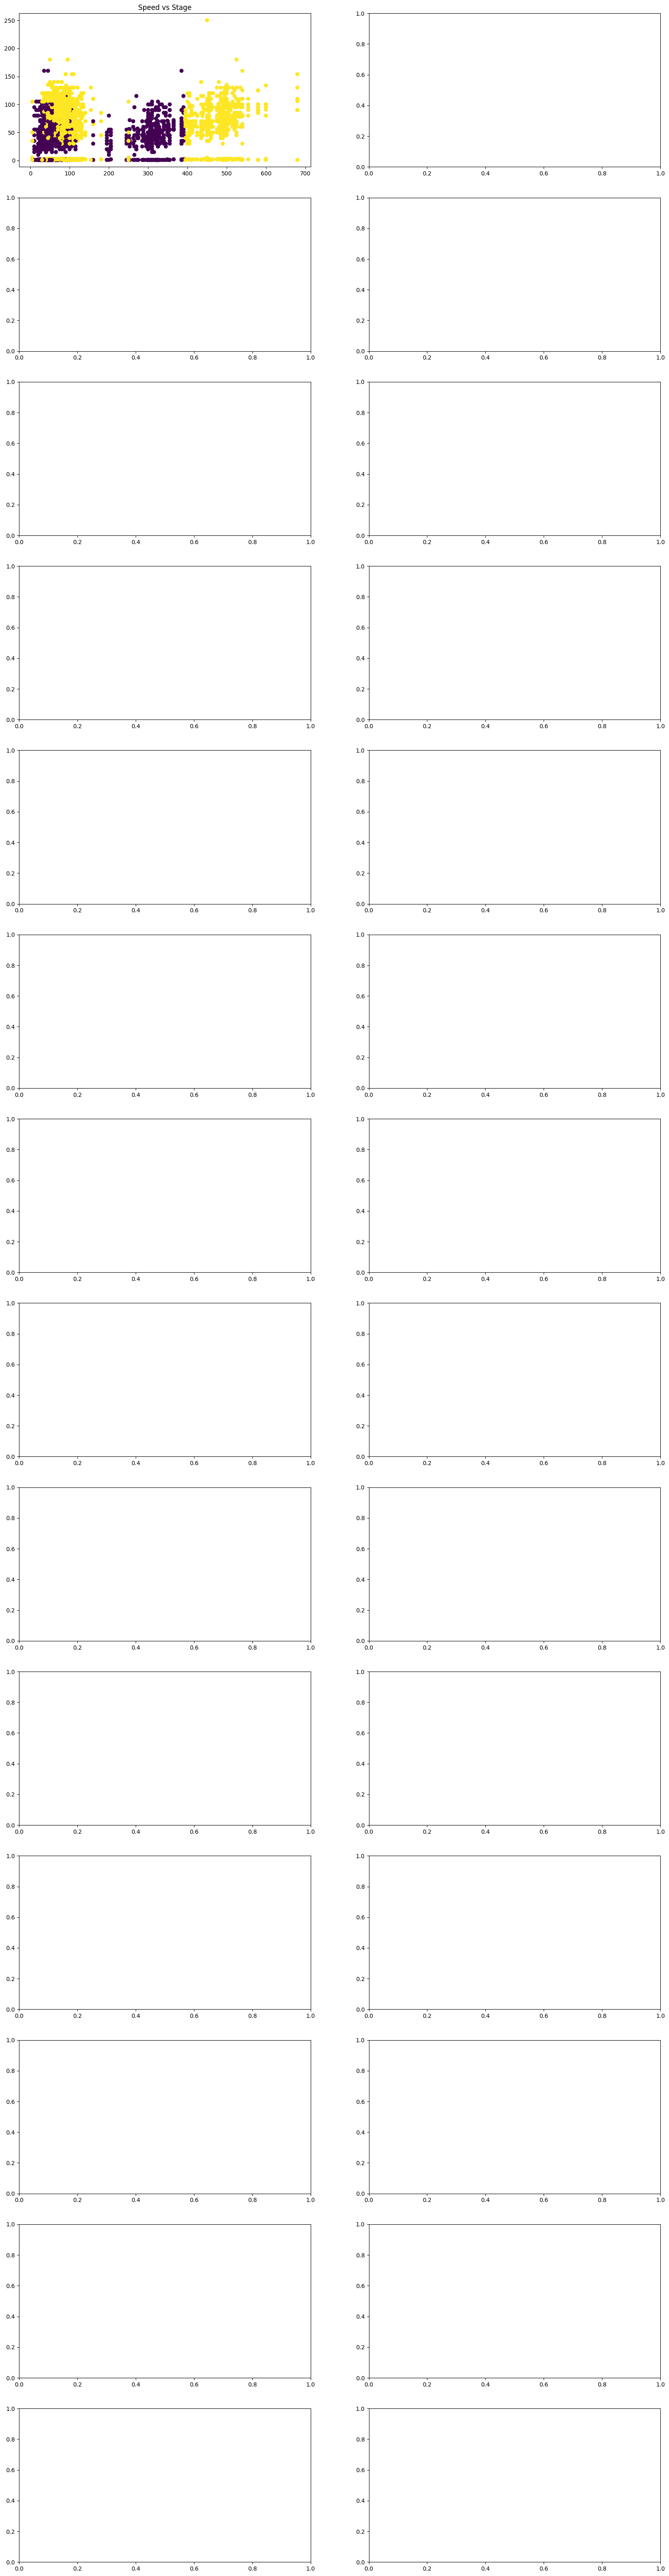

In [9]:
columns = list(pokeman_mean.columns)
for column in columns:
    dist = np.abs(pokeman_mean[column][0] -
pokeman_mean[column][1])/max(pokeman_mean[column])
print('{}: {}'.format(column, dist))
plt.scatter(pokemon['Attack'], pokemon['Defense'],
c=pokemon['label'])
plt.scatter(pokemon['Sp. Atk'], pokemon['Sp. Def'],
c=pokemon['label'])
plt.scatter(pokemon['HP'], pokemon['Speed'], c=pokemon['label'])
plt.scatter(pokemon['Defense'], pokemon['Speed'],
c=pokemon['label'])
# using the variable axs for multiple Axes
fig, axs = plt.subplots(14, 2, figsize=(20,80))
columns = list(pokeman_mean.columns)
j2, i2 = 0, 0
for i in range(len(columns)-1):
    for j in range(i+1,len(columns)):
        if j2 > 1:
            j2 = 0
            i2 += 1
        axs[i2,j2].scatter(pokemon[columns[i]],
pokemon[columns[j]], c=pokemon['label'])
axs[i2,j2].set_title('{} vs {}'.format(columns[i],
columns[j]))
j2 += 1

              Total         HP     Attack    Defense    Sp. Atk    Sp. Def  \
label_c                                                                      
0        420.439024  66.682927  73.048780  68.317073  69.170732  70.487805   
1        299.948276  45.965517  53.775862  53.568966  47.672414  45.672414   
2        516.038462  82.615385  93.096154  84.500000  87.250000  85.192308   

             Speed     Stage  
label_c                       
0        72.731707  1.804878  
1        53.293103  1.051724  
2        83.384615  2.000000  


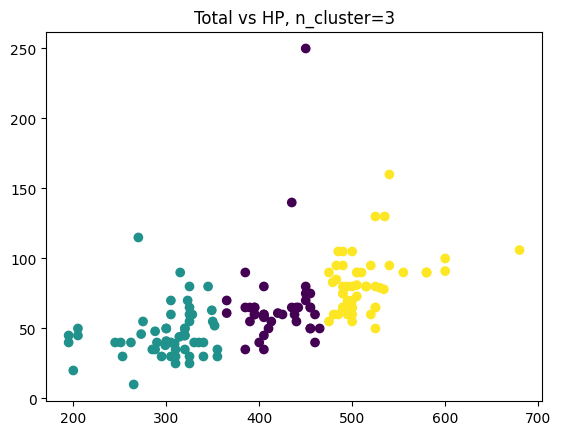

In [10]:
km = KMeans(n_clusters=3)
km.fit(pokemon[columns])
pokemon['label_c'] = km.predict(pokemon[columns])
pokeman_mean = pokemon.drop('label',
axis=1).groupby(['label_c']).agg('mean')
print(pokeman_mean)
plt.scatter(pokemon['Total'], pokemon['HP'], c=pokemon['label_c'])
plt.title('Total vs HP, n_cluster=3')
plt.show()

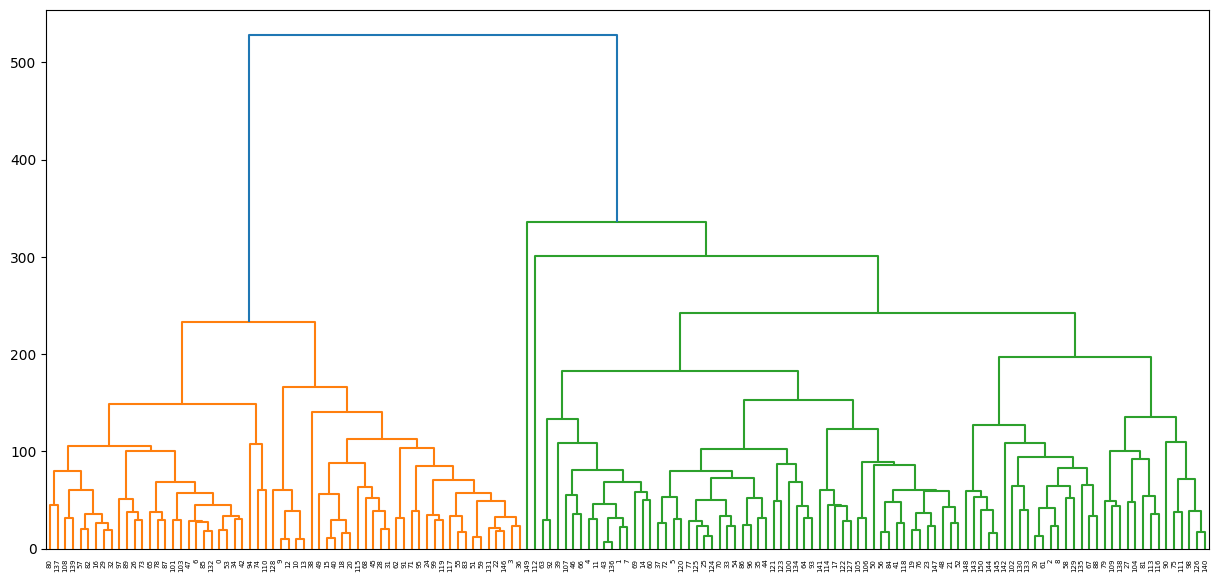

In [11]:
pokemon = df.drop(columns=['Type 1','Type 2','Legendary'])
dist = pdist(pokemon, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')
plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()

In [12]:
labels = cut_tree(linkage_matrix, n_clusters=3)
pokemon['label'] = labels
print("describe cluster labeled 0: \n",
pokemon[pokemon['label']==0].describe())
print("describe cluster labeled 1: \n",
pokemon[pokemon['label']==1].describe())

describe cluster labeled 0: 
             Total          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count   62.000000   62.000000   62.000000   62.000000   62.000000   62.000000   
mean   304.870968   46.564516   54.725806   56.548387   47.580645   45.951613   
std     43.399586   17.433359   18.718947   25.824551   19.360724   15.942959   
min    195.000000   10.000000   10.000000   15.000000   15.000000   20.000000   
25%    288.500000   35.000000   45.000000   40.000000   35.000000   35.000000   
50%    310.000000   42.500000   52.000000   50.000000   45.000000   45.000000   
75%    325.000000   55.000000   65.000000   65.000000   57.250000   55.000000   
max    390.000000  115.000000  105.000000  160.000000  105.000000  100.000000   

            Speed      Stage  label  
count   62.000000  62.000000   62.0  
mean    53.500000   1.096774    0.0  
std     20.517685   0.298064    0.0  
min     15.000000   1.000000    0.0  
25%     40.000000   1.000000    0.0  
50%     50.0

In [13]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
df = pd.read_csv("A1_BC_SEER_data.csv", )
df = shuffle(df)

In [14]:
target = df['Survival months'] #Extract the target column
#Binarize target
target = np.where(df['Survival months'] < 60, 0, target)
target = np.where(df['Survival months'] >= 60, 1, target)

In [15]:
from sklearn.model_selection import train_test_split
myseed=7 #Seed for the random number generator
#Remove irrelevant features, and targets from df
dropList = ['Patient ID', 'Survival months']
for item in dropList:
    df.drop(item, axis=1, inplace=True)
#Scale the data (think about whether the next three lines
# should be uncommented)?
#from sklearn import preprocessing
#scaling = preprocessing.MinMaxScaler()
#data = scaling.fit_transform(data)
#Create a train, test, and validation set
X, X_tst, Y, Y_tst = train_test_split(df, target, test_size=.333,
random_state=myseed)
X_trn, X_val, Y_trn, Y_val = train_test_split(X, Y, test_size=.5,
random_state=myseed)
X_trn = X_trn.to_numpy()
X_tst = X_tst.to_numpy()
X_val = X_val.to_numpy()

In [18]:
from myminisom import MiniSom #see myminisom.py
#Create the SOM
som_shape = (100, 100) #define the size of the som
som = MiniSom(som_shape[0], som_shape[1], X_trn.shape[1],
sigma=som_shape[0]/2, learning_rate=.9,
neighborhood_function='gaussian', random_seed=myseed)
#initialize the SOM, then train it
epochs=40
som.pca_weights_init(X_trn)
som.train_random(X_trn, epochs * len(X_trn), verbose=True)
#Find the BMU for each sample
BMU_trn = np.array([som.winner(x) for x in X_trn])
BMU_class0 = BMU_trn[Y_trn==0]
BMU_class1 = BMU_trn[Y_trn==1]

 [  2762724 / 13907320 ]  20% - 4:44:17 left 

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from copy import copy
densitymap = np.zeros(som_shape)
for row in range(0,BMU_trn.shape[0]):
    x,y = BMU_trn[row]
    densitymap[y,x] += 1
densitymap[densitymap==0]=np.nan #mark zero values with nan
my_cmap = copy(plt.cm.jet)
my_cmap.set_bad(color=(1,1,1)) #plot nan in white color
plt.imshow(densitymap, cmap=my_cmap, interpolation="none",
origin="lower", aspect=0.75)
plt.colorbar()
plt.title('Mapping density')
plt.show()